Студент Жилкин Федор, 344
# Домашняя работа 5: "Простейшие методы приближенного вычисления интегралов."
**Задания:**

Требуется вычислить 
 
$\int\limits_0^1 \frac {cos(2x)}{\sqrt[3]{x^2}}dx$

следующими способами:
1. "Точно"
2. По формуле средних прямоугольников с тремя узлами
3. Построить интерполяционную формулу с весом $\frac {1}{\sqrt[3]{x^2}}$ по узлам $x_1 = \frac {1}{6}$, $x_2 = \frac {1}{2}$, $x_3 = \frac {5}{6}$ и вычислить итеграл по этой формуле

In [55]:
import numpy as np
import pylab as plt
from sympy import *
import pandas as pd

In [133]:
def F(x):
    return np.cos(2*x)/(x**(2/3))

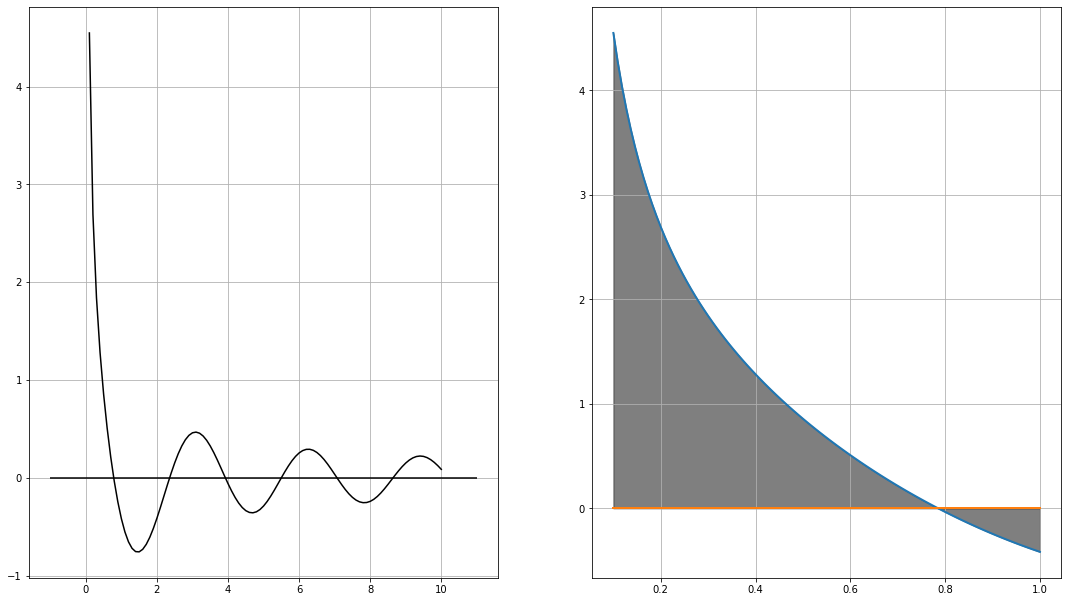

In [56]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

a = fig.add_subplot(1, 2, 1)
x = np.linspace(0.1, 10, 100)
y = np.cos(2*x)/(x**(2/3))
a.plot(x, y, color='black')
a.hlines(0, -1, 11, color='black')
a.grid(True)

a = fig.add_subplot(1, 2, 2)
x  = np.linspace(0.1, 1, 100)
y1 = np.cos(2*x)/(x**(2/3))
y2 = x*0
plt.plot(x,y1,lw=2)
plt.plot(x,y2,lw=2)
plt.fill_between(x, y1,y2,color='k',alpha=.5)
a.grid(True)

**Точное значение: 2.2834**

## Формула средних прямоугольников с тремя узлами

In [8]:
def trapezoidal_sum(roof , floor, n):
    h = (roof - floor) / (n-1)
    values = []
    args = [] 
    for i in range(n):
        args.append(floor + i*h)  
    for i in range(n-1):
        values.append(F((args[i] + args[i+1]) / 2) * (args[i+1] - args[i]))
    return sum(values)

In [20]:
much_points_value = trapezoidal_sum(1, 0, 10000)
much_points_value

2.2166686053845566

In [12]:
three_points_value = trapezoidal_sum(1, 0, 3)
three_points_value

1.148530751356252

In [21]:
h1 = round(2.2834 - much_points_value, 5)
h2 = round(2.2834 - three_points_value, 5)
h1, h2

(0.06673, 1.13487)

**Погрешность формулы с тремя узлами: 1.13487**

**Погрешность формулы с 10000 узлами: 0.06673**

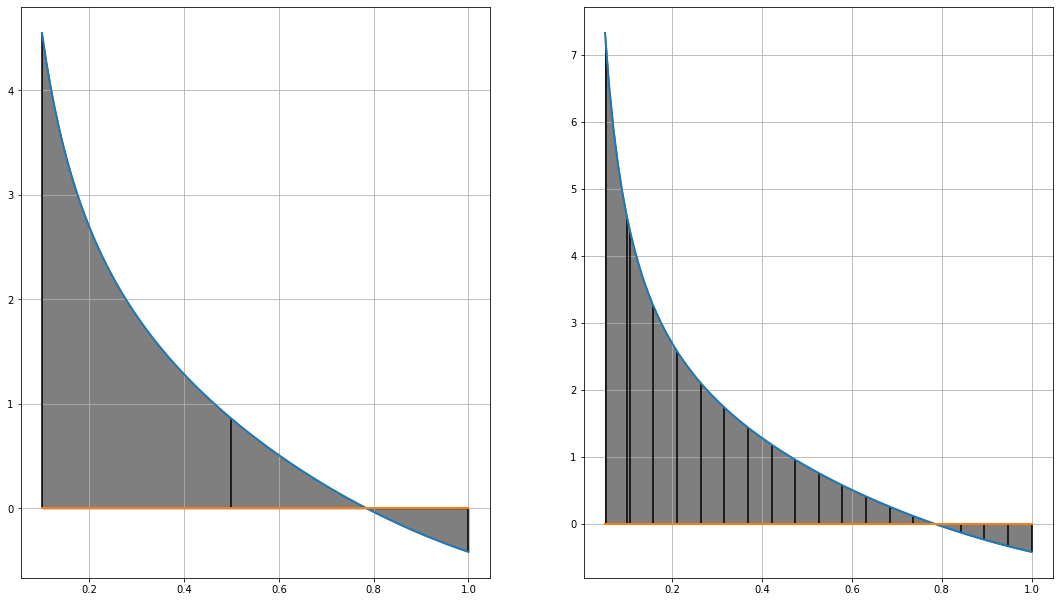

In [78]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)


ax = fig.add_subplot(1,2,1)
h = 1/2
fl = True
for i in range(3):
    if fl: 
        ax.vlines(0.1 + i*h, 0, F(0.1 + i*h))
        fl = False
    else:
        ax.vlines(i*h, 0, F(i*h))
    
x  = np.linspace(0.1, 1, 100)
y1 = np.cos(2*x)/(x**(2/3))
y2 = x*0
plt.plot(x,y1,lw=2)
plt.plot(x,y2,lw=2)
plt.fill_between(x, y1,y2,color='k',alpha=.5)
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
h = 1/19
fl = True
for i in range(20):
    if fl: 
        ax.vlines(0.1 + i*h, 0, F(0.1 + i*h))
        fl = False
    else:
        ax.vlines(i*h, 0, F(i*h))
        
x  = np.linspace(0.05, 1, 100)
y1 = np.cos(2*x)/(x**(2/3))
y2 = x*0
plt.plot(x,y1,lw=2)
plt.plot(x,y2,lw=2)
plt.fill_between(x, y1,y2,color='k',alpha=.5)
ax.grid(True)



## Интерполяционная формула

In [129]:
def interpol_form(p, x1=1/6, x2=1/2, x3=5/6):
    
    A1 = integrate((p*x-x2*p)*(x-x3)/((x1-x2)*(x1-x3)), (x, 0, 1))
    A2 = integrate((p*x-x1*p)*(x-x3)/((x2-x1)*(x2-x3)), (x, 0, 1))
    A3 = integrate((p*x-x1*p)*(x-x2)/((x3-x2)*(x3-x1)), (x, 0, 1))
    
    return F(x1)*A1 + F(x2)*A2 + F(x3)*A3

In [134]:
x = Symbol('x')
interpol_form(1/x**(2/3))

8.70567629033478

**Потрясающая погрешность: 6.422**